## 线性回归预测乘坐出租车所需的费用

### 非线性变换

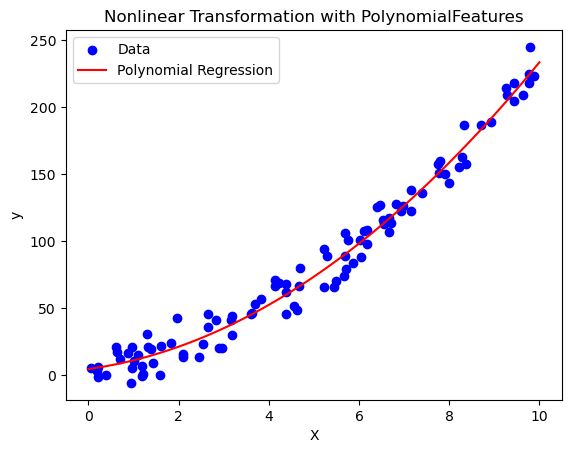

In [1]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# 生成一些非线性数据
np.random.seed(0)
X = np.random.rand(100, 1) * 10  # 生成 100 个随机点
y = 2 * X**2 + 3 * X + 5 + np.random.randn(100, 1) * 10  # 二次关系 + 噪声

原本每条数据只有一个特征，通过PolynomialFeatures二次多项式变换，将每条数据的特征扩展为三个

In [3]:
X.shape

(100, 1)

In [ ]:
poly = PolynomialFeatures(degree=2)  # 二次多项式
X_poly = poly.fit_transform(X)  # 将 X 转换为多项式特征

In [2]:
X_poly.shape

(100, 3)

In [ ]:

# 使用线性回归拟合变换后的数据
model = LinearRegression()
model.fit(X_poly, y)

In [ ]:

# 预测
X_test = np.linspace(0, 10, 100).reshape(-1, 1)  # 测试数据
X_test_poly = poly.transform(X_test)  # 对测试数据进行相同的变换
y_pred = model.predict(X_test_poly)

In [ ]:

# 可视化结果
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X_test, y_pred, color='red', label='Polynomial Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Nonlinear Transformation with PolynomialFeatures')
plt.legend()
plt.show()

导入相关库

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

准备数据

In [3]:
chicago_taxi_dataset = pd.read_csv(
    "./data/chicago_taxi_train.csv")
data = chicago_taxi_dataset
data.head()

,TRIP_START_TIMESTAMP,TRIP_END_TIMESTAMP,TRIP_START_HOUR,TRIP_SECONDS,TRIP_MILES,TRIP_SPEED,PICKUP_CENSUS_TRACT,DROPOFF_CENSUS_TRACT,PICKUP_COMMUNITY_AREA,DROPOFF_COMMUNITY_AREA,FARE,TIPS,TIP_RATE,TOLLS,EXTRAS,TRIP_TOTAL,PAYMENT_TYPE,COMPANY
0,05/17/2022 7:15:00 AM,05/17/2022 7:45:00 AM,7.25,2341,2.57,4.0,NaN,NaN,NaN,17.0,31.99,2.0,6.3,0.0,0.0,33.99,Mobile,Flash Cab
1,05/17/2022 5:15:00 PM,05/17/2022 5:30:00 PM,17.25,1074,1.18,4.0,NaN,1.703108e+10,NaN,8.0,9.75,3.0,27.9,0.0,1.0,14.25,Credit Card,Flash Cab
2,05/17/2022 5:15:00 PM,05/17/2022 5:30:00 PM,17.25,1173,1.29,4.0,1.703132e+10,1.703108e+10,32.0,8.0,10.25,0.0,0.0,0.0,0.0,10.25,Cash,Sun Taxi
3,05/17/2022 6:00:00 PM,05/17/2022 7:00:00 PM,18.00,3360,3.70,4.0,1.703132e+10,1.703124e+10,32.0,24.0,23.75,0.0,0.0,0.0,1.0,24.75,Cash,Choice Taxi Association
4,05/17/2022 5:00:00 PM,05/17/2022 5:30:00 PM,17.00,1044,1.15,4.0,1.703132e+10,1.703108e+10,32.0,8.0,10.00,0.0,0.0,0.0,0.0,10.00,Cash,Flash Cab


### 使用SKLearn库线性回归

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X = data[['TRIP_SECONDS', 'TRIP_MILES', 'TRIP_SPEED']]
y = data['FARE']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
# 创建线性回归模型
model = LinearRegression()
# 训练模型
model.fit(X_train, y_train)
# 预测
y_pred = model.predict(X_test)
# 计算均方误差
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
# 显示预测结果
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions.head())

Mean Squared Error: 12.932704276397478
       Actual  Predicted
14862   14.84  15.876162
13573    4.75   5.438069
29374   33.50  33.774751
21547   23.00  23.687711
5658     9.68   9.578472


### 自定义线性回归
#### 正规方程算法

准备数据

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
X_train, y_train

(       TRIP_SECONDS  TRIP_MILES  TRIP_SPEED
 7760            681        2.06        10.9
 24614          1187        9.53        28.9
 19571           180        1.10        22.0
 15097          3780       17.60        16.8
 29616          1413       15.61        39.8
 ...             ...         ...         ...
 29802          1174       13.20        40.5
 5390            389        1.05         9.7
 860             534        0.97         6.5
 15795          2400       11.70        17.6
 23654          1516       11.53        27.4
 
 [25355 rows x 3 columns],
 7760      9.00
 24614    26.00
 19571     5.75
 15097    47.00
 29616    39.25
          ...  
 29802    33.75
 5390      6.50
 860       7.00
 15795    33.75
 23654    31.25
 Name: FARE, Length: 25355, dtype: float64)

训练模型

In [ ]:
np.ones((X_train.shape[0], 1))  # 截距项

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [17]:
# 按列连接两个矩阵，即将截距项添加到特征矩阵中
X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_b

array([[1.000e+00, 6.810e+02, 2.060e+00, 1.090e+01],
       [1.000e+00, 1.187e+03, 9.530e+00, 2.890e+01],
       [1.000e+00, 1.800e+02, 1.100e+00, 2.200e+01],
       ...,
       [1.000e+00, 5.340e+02, 9.700e-01, 6.500e+00],
       [1.000e+00, 2.400e+03, 1.170e+01, 1.760e+01],
       [1.000e+00, 1.516e+03, 1.153e+01, 2.740e+01]])

计算权重系数

这里使用了正规方程求解

In [16]:
coefficients = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)
coefficients

array([2.98396026, 0.00308128, 1.89367699, 0.05660665])

预测模型

In [ ]:
X_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]
y_pred = X_b.dot(coefficients)

array([15.87616187,  5.43806918, 33.77475067, ..., 48.13077469,
        5.05149483, 18.07363375])

评估

In [21]:
# 计算均方误差
custom_mse = mean_squared_error(y_test, y_pred)
print(f'Custom Model Mean Squared Error: {custom_mse}')
# 显示预测结果
custom_predictions = pd.DataFrame(
    {'Actual': y_test, 'Predicted': custom_y_pred})
print(custom_predictions.head())

Custom Model Mean Squared Error: 12.932704276397478
       Actual  Predicted
14862   14.84  15.876162
13573    4.75   5.438069
29374   33.50  33.774751
21547   23.00  23.687711
5658     9.68   9.578472


整理格式

In [27]:
f"""当TRIP_SECONDS=1000, TRIP_MILES=5, TRIP_SPEED=5时,
预测的FARE为{model.predict([[1000, 5, 5]])[0]:.2f}美元"""

d:\Python\CondaEnvs\DataAnalysis\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


'当TRIP_SECONDS=1000, TRIP_MILES=5, TRIP_SPEED=5时,\n预测的FARE为15.82美元'